In [1]:
#data loading
import pandas as pd
filename="/content/NMES1988.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames  visits  emergency     health  chronic      adl  age afam  \
0            1       5          0    average        2   normal  6.9  yes   
1            2       1          2    average        2   normal  7.4   no   
2            3      13          3       poor        4  limited  6.6  yes   
3            4      16          1       poor        2  limited  7.6   no   
4            5       3          0    average        2  limited  7.9   no   
...        ...     ...        ...        ...      ...      ...  ...  ...   
4401      4402      11          0    average        0   normal  8.4   no   
4402      4403      12          0    average        2   normal  7.8   no   
4403      4404      10          1    average        5   normal  7.3   no   
4404      4405      16          0    average        0   normal  6.6   no   
4405      4406       0          0  excellent        0   normal  7.1   no   

      gender married    income employed insurance medicaid  
0       male     yes  2.88

In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
visits,0
emergency,0
health,0
chronic,0
adl,0
age,0
afam,0
gender,0
married,0


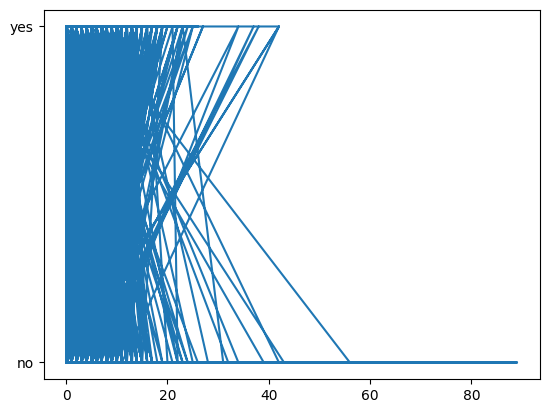

In [4]:
from matplotlib import pyplot as plt
target="medicaid"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 4406 artists>

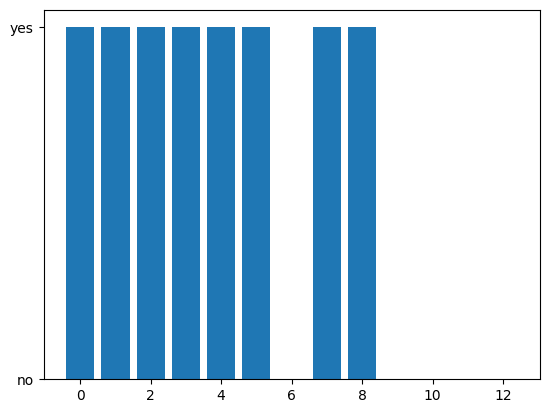

In [5]:
plt.bar(a[a.columns[2]],a[str(target)])

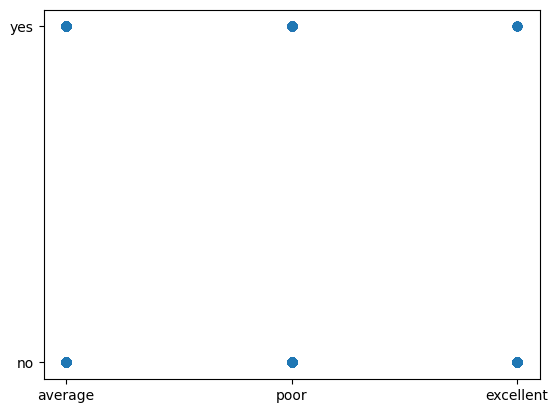

In [6]:
plt.scatter(a[a.columns[3]], a[str(target)])

In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={3,5,7,8,9,11,12,13}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames  visits  emergency  health  chronic  adl  age  afam  gender  \
0            1       5          0       0        2    1  6.9     1       1   
1            2       1          2       0        2    1  7.4     0       0   
2            3      13          3       2        4    0  6.6     1       0   
3            4      16          1       2        2    0  7.6     0       1   
4            5       3          0       0        2    0  7.9     0       0   
...        ...     ...        ...     ...      ...  ...  ...   ...     ...   
4401      4402      11          0       0        0    1  8.4     0       0   
4402      4403      12          0       0        2    1  7.8     0       0   
4403      4404      10          1       0        5    1  7.3     0       1   
4404      4405      16          0       0        0    1  6.6     0       0   
4405      4406       0          0       1        0    1  7.1     0       1   

      married    income  employed  insurance  medicaid  
0     

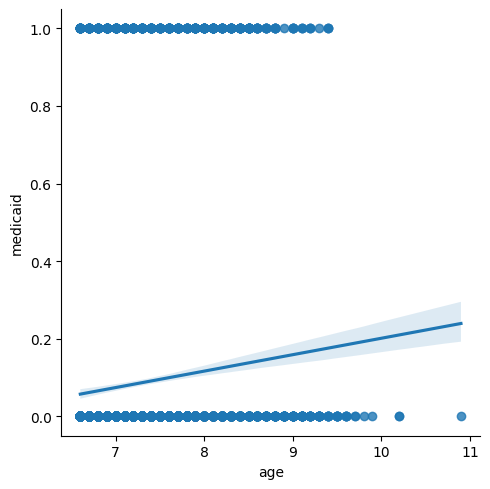

In [9]:
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="age",y=str(target),data=a)

<Axes: xlabel='visits', ylabel='medicaid'>

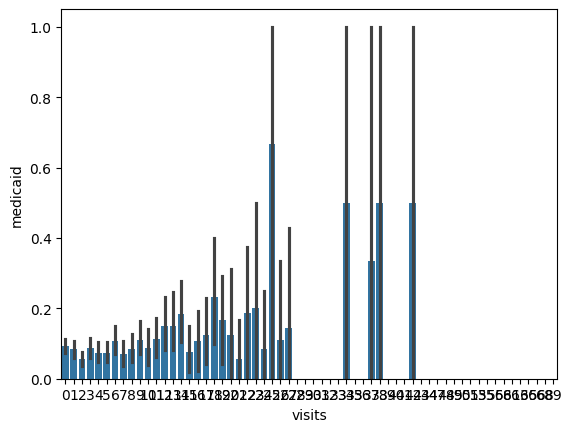

In [10]:
sns.barplot(x=a.columns[1],y=str(target),data=a)

<Axes: xlabel='emergency', ylabel='medicaid'>

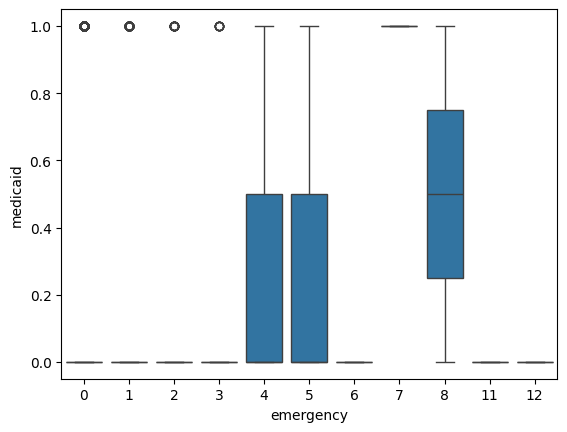

In [11]:
sns.boxplot(x=a.columns[2],y=str(target),data=a)

<ipython-input-12-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='medicaid', ylabel='Density'>

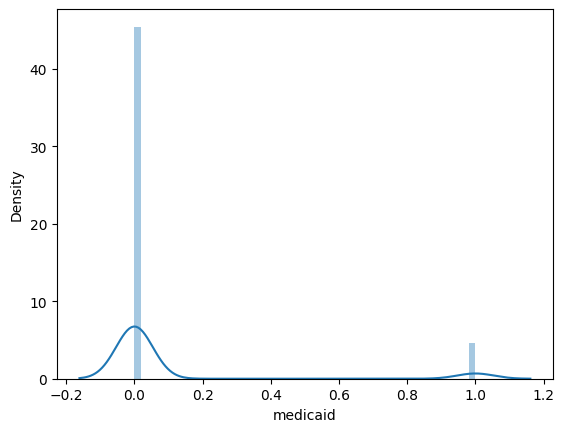

In [12]:
sns.distplot(a[str(target)])

<Axes: xlabel='visits', ylabel='Density'>

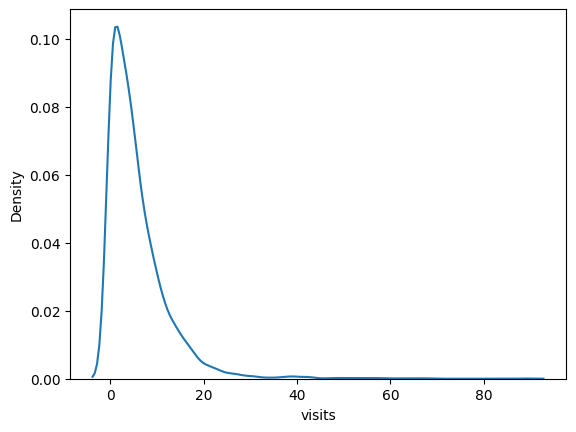

In [13]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='chronic', ylabel='count'>

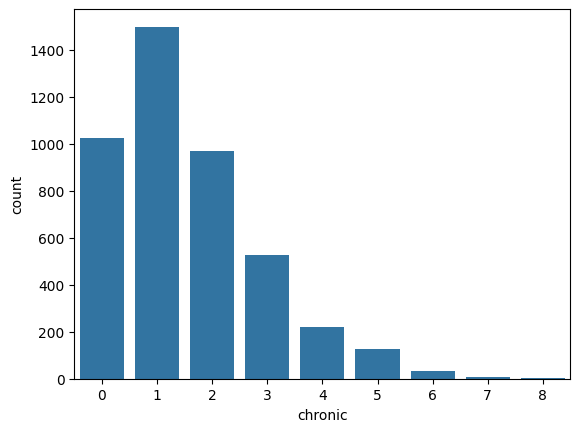

In [14]:
sns.countplot(x=a.columns[4],data=a)

<Axes: >

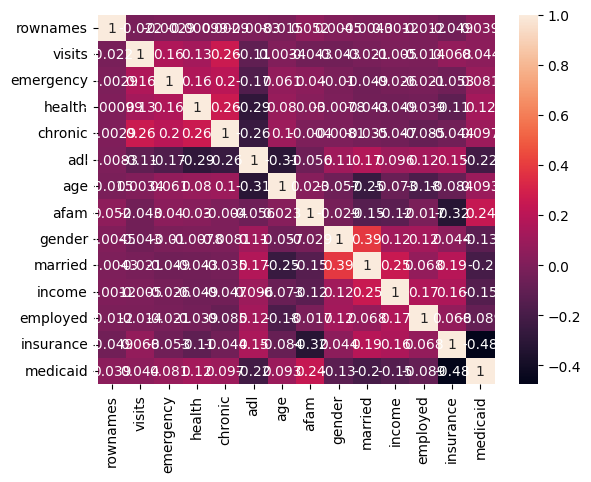

In [15]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

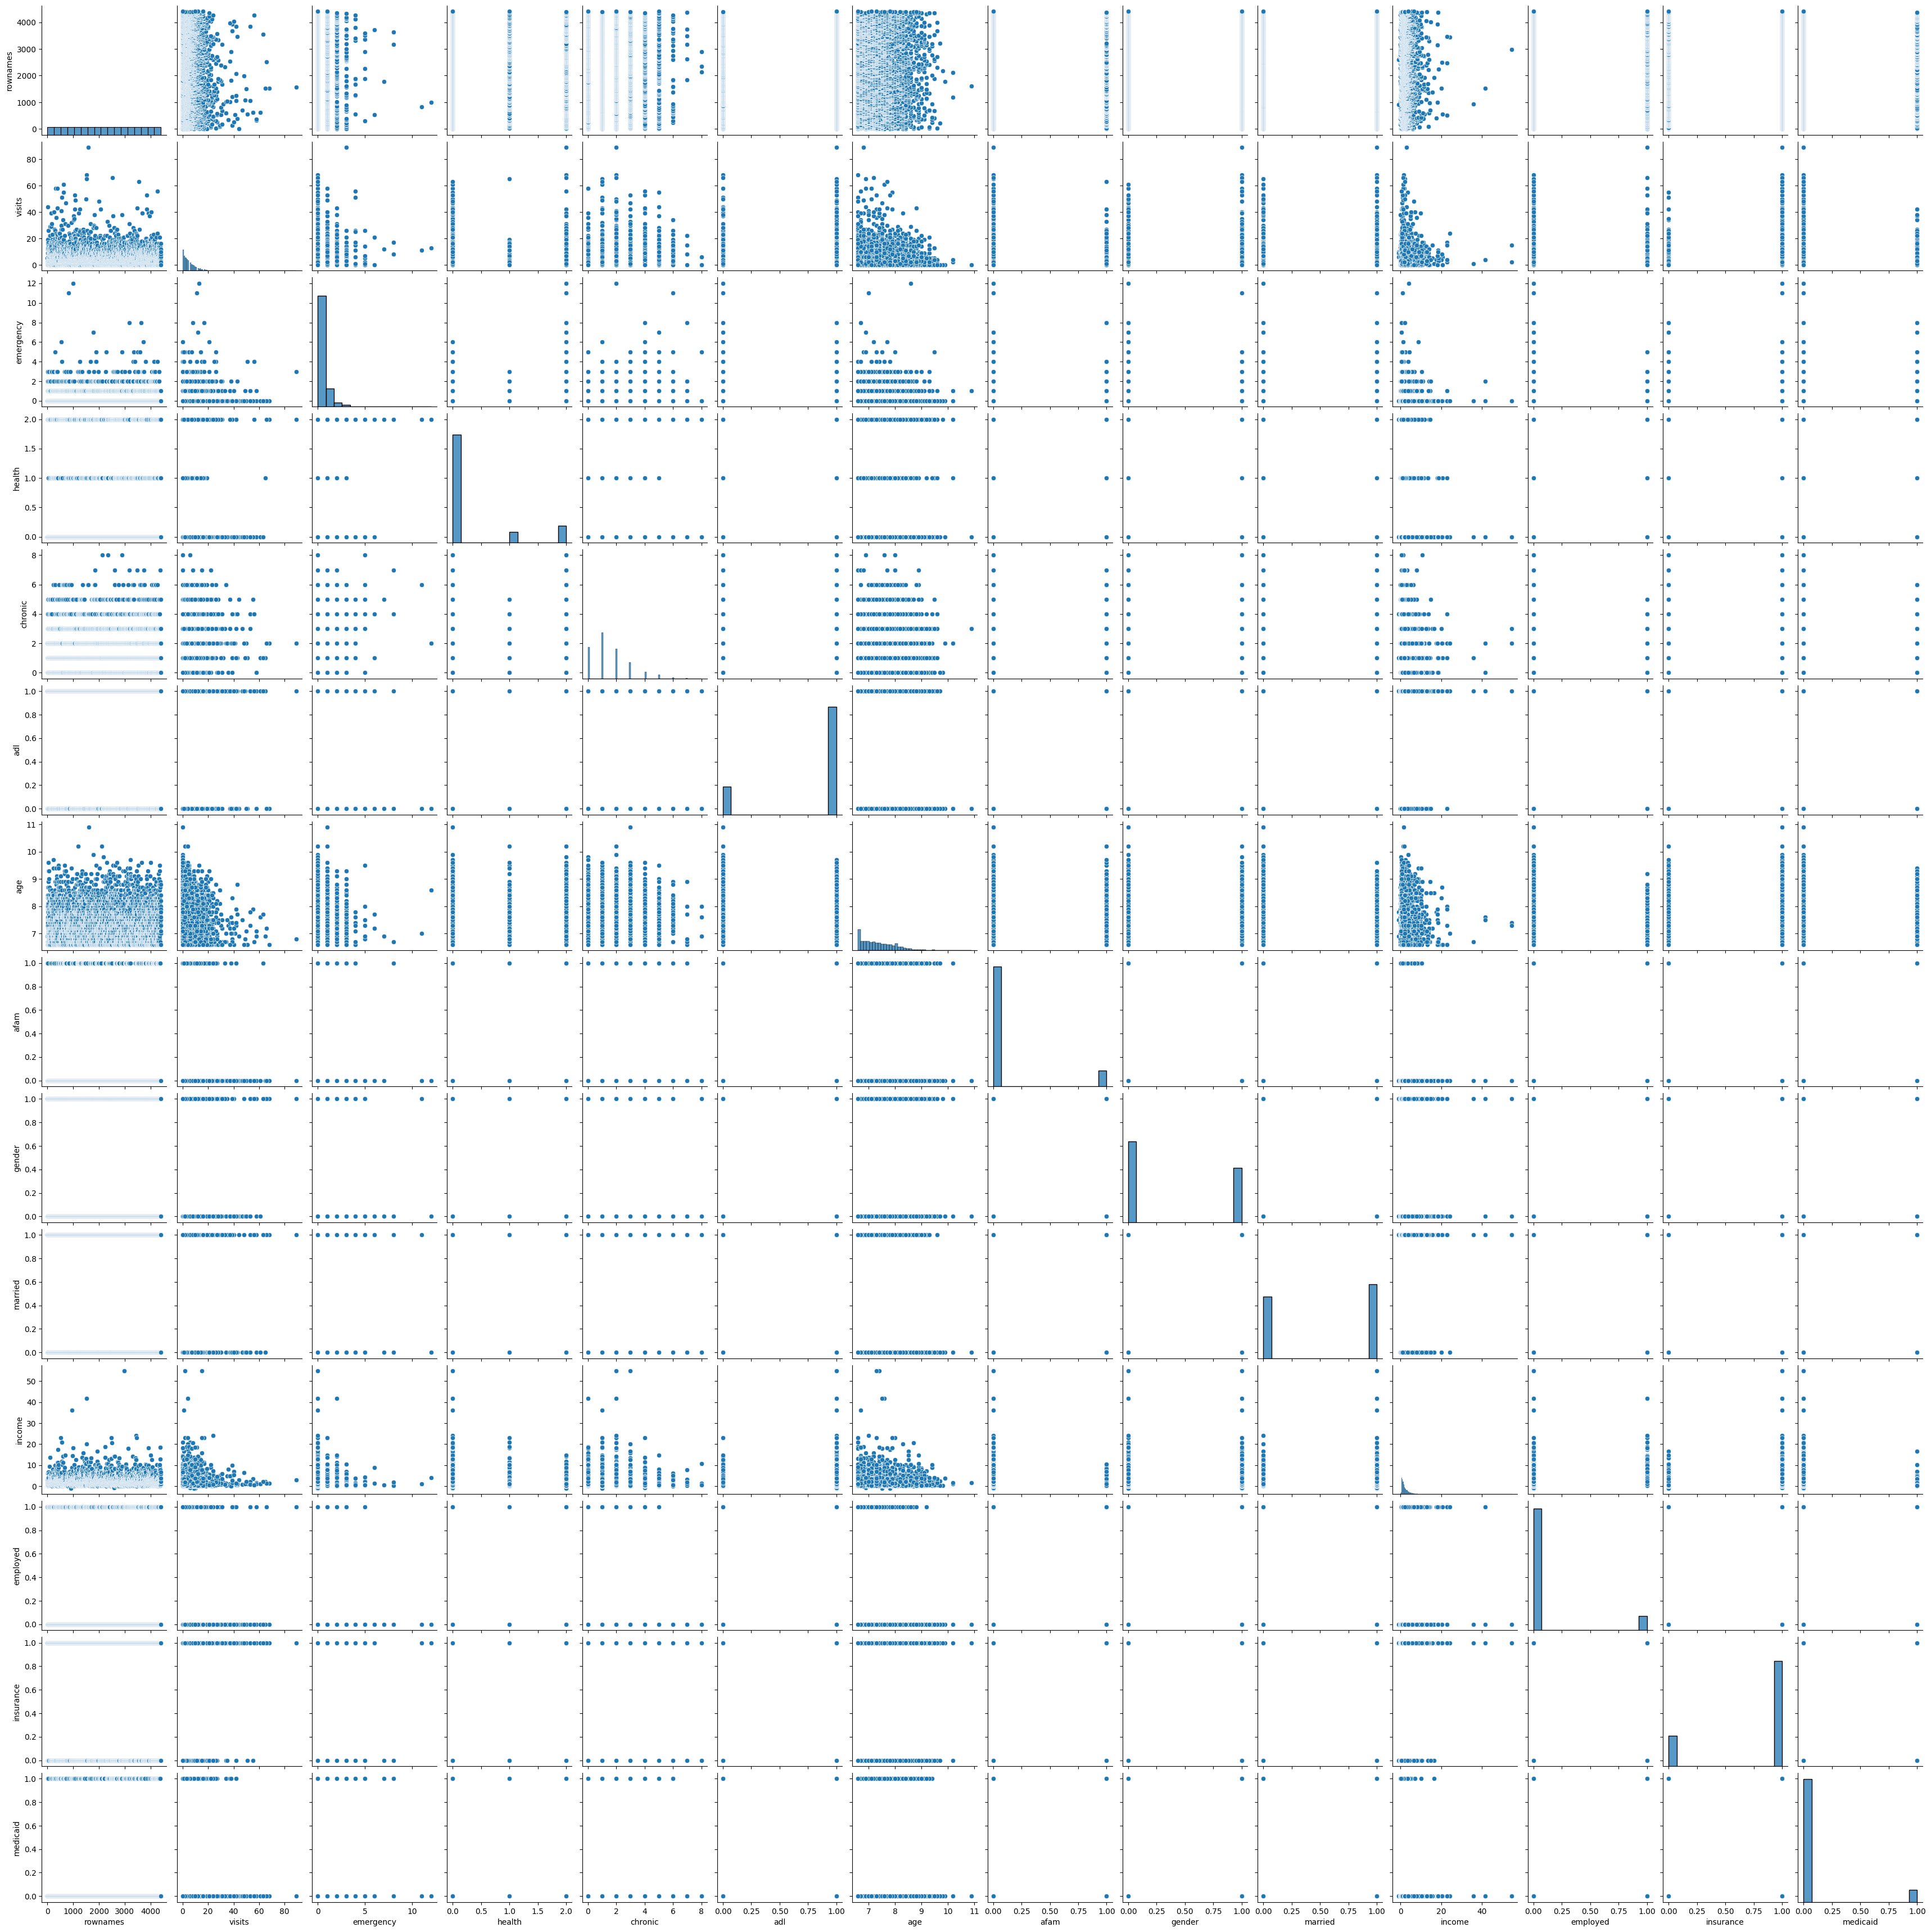

In [16]:
sns.pairplot(data=a)

In [17]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  visits  emergency  health  chronic  adl  age  afam  gender  \
0            1       5          0       0        2    1  6.9     1       1   
1            2       1          2       0        2    1  7.4     0       0   
2            3      13          3       2        4    0  6.6     1       0   
3            4      16          1       2        2    0  7.6     0       1   
4            5       3          0       0        2    0  7.9     0       0   
...        ...     ...        ...     ...      ...  ...  ...   ...     ...   
4401      4402      11          0       0        0    1  8.4     0       0   
4402      4403      12          0       0        2    1  7.8     0       0   
4403      4404      10          1       0        5    1  7.3     0       1   
4404      4405      16          0       0        0    1  6.6     0       0   
4405      4406       0          0       1        0    1  7.1     0       1   

      married    income  employed  insurance  
0           1  2

In [18]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
4401    0
4402    0
4403    0
4404    0
4405    0
Name: medicaid, Length: 4406, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
print(x_train)

      rownames  visits  emergency  health  chronic  adl  age  afam  gender  \
292        293       3          0       0        0    1  6.8     0       1   
1923      1924       1          0       0        3    1  8.5     0       0   
1647      1648       4          0       0        1    0  8.2     1       0   
2249      2250       4          0       0        2    1  6.7     0       0   
1006      1007       0          0       0        0    1  7.3     0       0   
...        ...     ...        ...     ...      ...  ...  ...   ...     ...   
4003      4004      15          0       2        2    0  7.0     0       0   
2058      2059       3          0       0        0    1  7.4     1       0   
3383      3384       8          0       2        0    0  7.0     0       0   
474        475      24          0       0        3    1  7.8     0       1   
4001      4002       9          0       0        4    1  7.3     0       0   

      married     income  employed  insurance  
292         1  

In [21]:
print(y_train)

292     0
1923    1
1647    0
2249    0
1006    0
       ..
4003    0
2058    0
3383    0
474     0
4001    0
Name: medicaid, Length: 3524, dtype: int64


In [22]:
print(x_test)

      rownames  visits  emergency  health  chronic  adl  age  afam  gender  \
3002      3003       2          0       0        3    1  6.8     0       0   
24          25       5          0       0        3    1  8.9     0       0   
3656      3657       0          0       2        0    1  7.9     0       0   
2165      2166       1          0       0        1    0  8.3     0       1   
1231      1232       3          0       0        3    0  7.7     0       0   
...        ...     ...        ...     ...      ...  ...  ...   ...     ...   
4180      4181       4          0       0        1    1  8.1     1       0   
1610      1611       7          0       0        1    1  6.9     0       0   
1836      1837       3          0       2        4    0  8.6     0       1   
4272      4273       0          0       0        1    1  6.8     1       0   
1412      1413       1          0       0        0    1  8.2     0       0   

      married    income  employed  insurance  
3002        1  1

In [23]:
print(y_test)

3002    1
24      0
3656    0
2165    0
1231    0
       ..
4180    1
1610    0
1836    0
4272    0
1412    0
Name: medicaid, Length: 882, dtype: int64


In [24]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print(ypred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [26]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9206349206349206


In [27]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[794  21]
 [ 49  18]]


In [29]:
print(model.predict([[3003,2,0,0,3,1,6.8,0,0,1,1.149600,0,0]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [31]:
print(ypred)

[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [32]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.8809523809523809


In [33]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[750  65]
 [ 40  27]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       815
           1       0.29      0.40      0.34        67

    accuracy                           0.88       882
   macro avg       0.62      0.66      0.64       882
weighted avg       0.90      0.88      0.89       882



In [36]:
print(model.predict([[3003,2,0,0,3,1,6.8,0,0,1,1.149600,0,0]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [38]:
print(ypred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 

In [39]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9308390022675737


In [40]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[792  23]
 [ 38  29]]


In [41]:
print(model.predict([[3003,2,0,0,3,1,6.8,0,0,1,1.149600,0,0]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       815
           1       0.56      0.43      0.49        67

    accuracy                           0.93       882
   macro avg       0.76      0.70      0.73       882
weighted avg       0.92      0.93      0.93       882

